Run the differential expression analysis

**Need to run first:**
- [`../0-prepare_data`](../0-prepare_data.ipynb)
- [`1-extract_samples`](1-extract_samples.ipynb)

**Table of content**
1. [Testing how the complexification of the model explain the data](#Testing-how-the-complexification-of-the-model-explain-the-data)
2. [Build the DESeqDataSetFromMatrix object](#Build-the-DESeqDataSetFromMatrix-object)
2. [Exploratory analysis and visualization](#Exploratory-analysis-and-visualization)
3. [Differential expression analysis](#Differential-expression-analysis)

*Generated from a Jupyter Notebook - [Sources](https://github.com/bebatut/neuromac_GF_mices/blob/master/src/microbiota-driven/2-run_dge_analysis.ipynb)*

# Load
## Libraries and functions

In [1]:
source("../load_libraries.R")

Warning message:
“package ‘matrixStats’ was built under R version 3.6.3”
Warning message:
“package ‘pheatmap’ was built under R version 3.6.3”
Warning message:
“package ‘gplots’ was built under R version 3.6.3”
Warning message:
“package ‘UpSetR’ was built under R version 3.6.3”
Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”
Warning message:
“package ‘plyr’ was built under R version 3.6.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 3.6.3”
Warning message:
“package ‘viridis’ was built under R version 3.6.3”
Warning message:
“package ‘viridisLite’ was built under R version 3.6.3”
Warning message:
“package ‘rentrez’ was built under R version 3.6.3”
Warning message:
“package ‘BiasedUrn’ was built under R version 3.6.3”
Warning message:
“package ‘dendextend’ was built under R version 3.6.3”
Warning message:
“package ‘reshape2’ was built under R version 3.6.3”
Warning message:
“package ‘XML’ was built under R version 3.6.3”
Warning message:
“packa

Allowing multi-threading with up to 8 threads.


Warning message:
“package ‘igraph’ was built under R version 3.6.3”
Warning message:
“package ‘threejs’ was built under R version 3.6.3”
Warning message:
“package ‘htmlwidgets’ was built under R version 3.6.3”
Warning message:
“package ‘xlsx’ was built under R version 3.6.3”
Warning message:
“package ‘reshape’ was built under R version 3.6.3”
Warning message:
“package ‘plotly’ was built under R version 3.6.3”
Warning message:
“package ‘ggfortify’ was built under R version 3.6.3”
Warning message:
“package ‘gridExtra’ was built under R version 3.6.3”
Warning message:
“package ‘sinaplot’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘factoextra’ was built under R version 3.6.3”
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
preparing gene to GO mapping dat

In [2]:
source("../functions.R")

## Get the data

In [3]:
dp = "../../results/dge/microbiota-driven/"
dir.create(dp, showWarnings = FALSE)

In [4]:
load(paste(dp, "metadata.RData", sep=''))
load(paste(dp, "prepared_counts.RData", sep=''))

# Testing how the complexification of the model explain the data

- Test of the addition of each factor and interactions
- Extraction of the number and percentage of genes with a significant p-values (< 0.05) for the Likelihood Ratio Tests

In [5]:
complexif_stats = tibble::data_frame(
    Design=character(),
    Reduced=character(),
    Tested=character(),
    Gene_nb=numeric(),
    Gene_perc=numeric())

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [6]:
# Design: project
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ project)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="project", Reduced="1", Tested="project", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 223 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [7]:
# Design: Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota", Reduced="1", Tested="Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 732 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [8]:
# Design: Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age", Reduced="1", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 601 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [9]:
# Design: Microbiota + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota + Age", Reduced="Microbiota", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 492 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [10]:
# Design: Age + Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age + Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age + Microbiota", Reduced="Age", Tested="Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 492 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [11]:
# Design: Microbiota + Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota + Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Microbiota + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota + Age + Microbiota:Age", Reduced="Microbiota + Age", Tested="Microbiota:Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 315 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



Genes with a significant p-values (< 0.05) for the Likelihood Ratio Tests 

In [12]:
complexif_stats %>%
    rename('Genes with significant LRT adjusted p-value' = Gene_nb) %>%
    rename('% genes with significant LRT adjusted p-value' = Gene_perc)

Design,Reduced,Tested,Genes with significant LRT adjusted p-value,% genes with significant LRT adjusted p-value
<chr>,<chr>,<chr>,<dbl>,<dbl>
project,1,project,7231,39.9216033
Microbiota,1,Microbiota,1025,5.6589190
Age,1,Age,3174,17.5233258
Microbiota + Age,Microbiota,Age,3205,17.6944736
Age + Microbiota,Age,Microbiota,1234,6.8127864
Microbiota + Age + Microbiota:Age,Microbiota + Age,Microbiota:Age,152,0.8391763


Percentage of variables' effect on transcriptomic profile

In [13]:
complexif_stats %>%
    group_by(Tested) %>%
    select(c(Tested, Gene_perc)) %>%
    summarise_all(funs(min(.),max(.)))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Tested,min,max
<chr>,<dbl>,<dbl>
Age,17.5233258,17.6944736
Microbiota,5.6589190,6.8127864
Microbiota:Age,0.8391763,0.8391763
project,39.9216033,39.9216033


Factor | Percentage of genes with LRT adjusted p-value < 0.05
--- | ---
Age | 17.53% - 17.69%
Microbiota | 5.66% - 6.81%
Microbiota:Age | 0.84%

# Build the DESeqDataSetFromMatrix object

Construct DESeqDataSet and organize levels of the factors (8w being the reference)

In [14]:
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota + Age + Microbiota:Age)
dds$Age = relevel(dds$Age, ref="Young")
dds$Microbiota = relevel(dds$Microbiota, ref="SPF")

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


# Exploratory analysis and visualization

We use here the variance stabilizing transformation 

In [15]:
vsd = vst(dds, blind = FALSE)

Distances between the samples

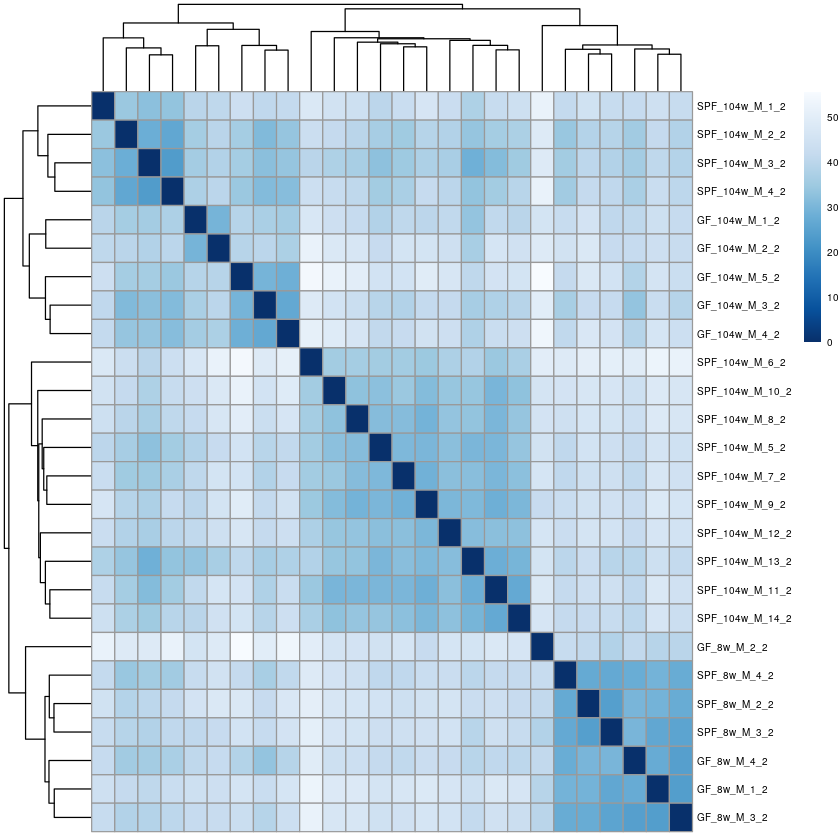

In [16]:
sampleDists = dist(t(assay(vsd)))
sampleDistMatrix = as.matrix( sampleDists )
colnames(sampleDistMatrix) = NULL
colors = colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         fontsize = 6)

PCA plot 

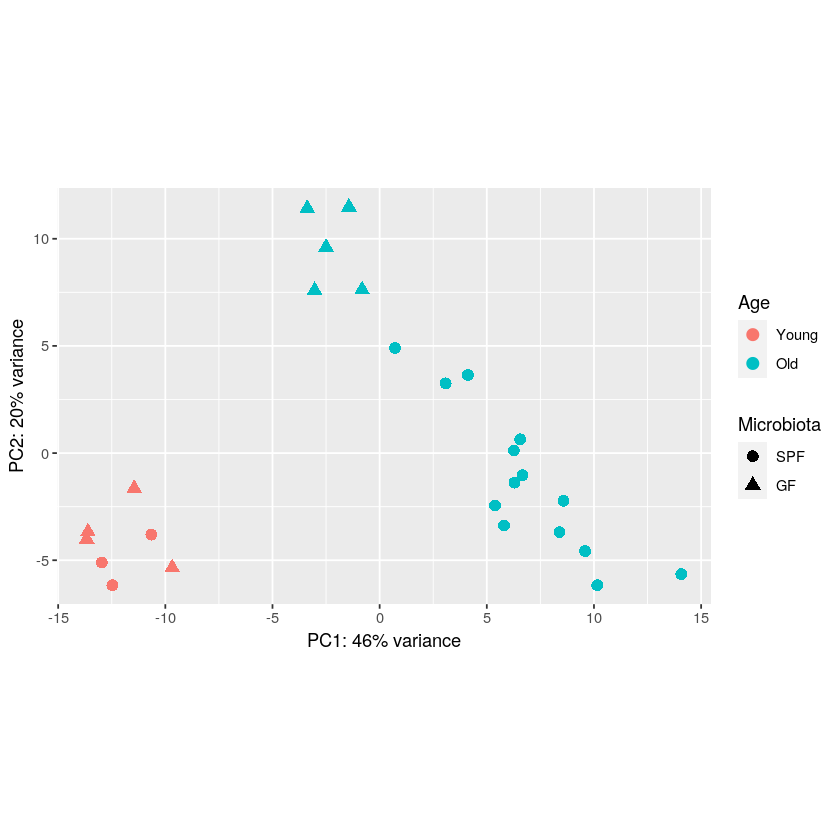

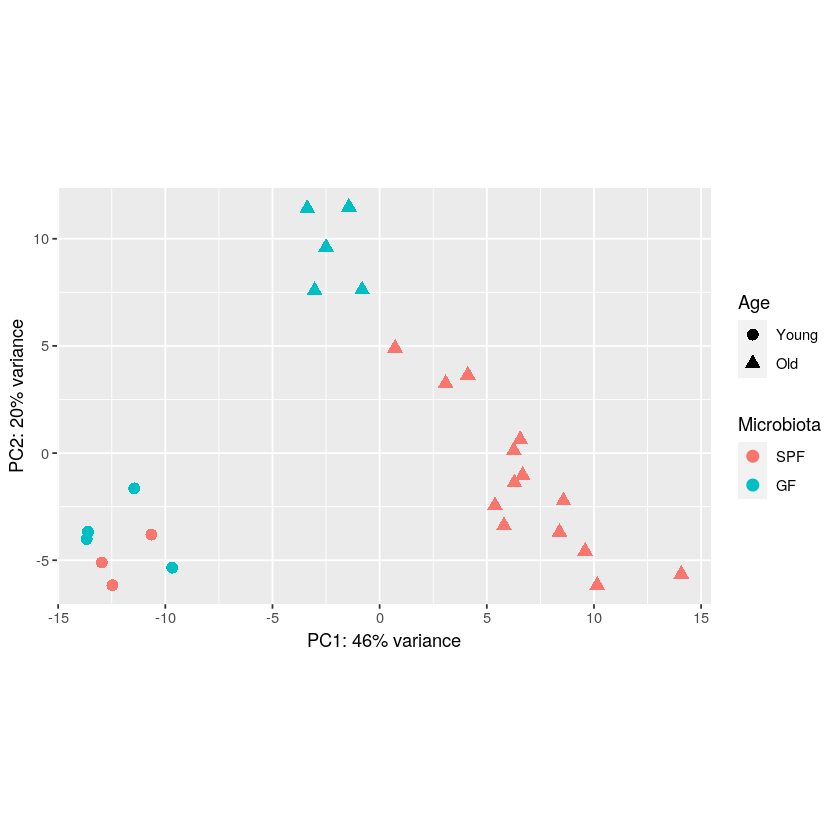

In [17]:
pcaData = plotPCA(vsd, intgroup = c("Microbiota", "Age"), returnData = TRUE)
percentVar = round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(x = PC1, y = PC2, color = Age, shape = Microbiota)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()
ggplot(pcaData, aes(x = PC1, y = PC2, color = Microbiota, shape = Age)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()

Batch effect

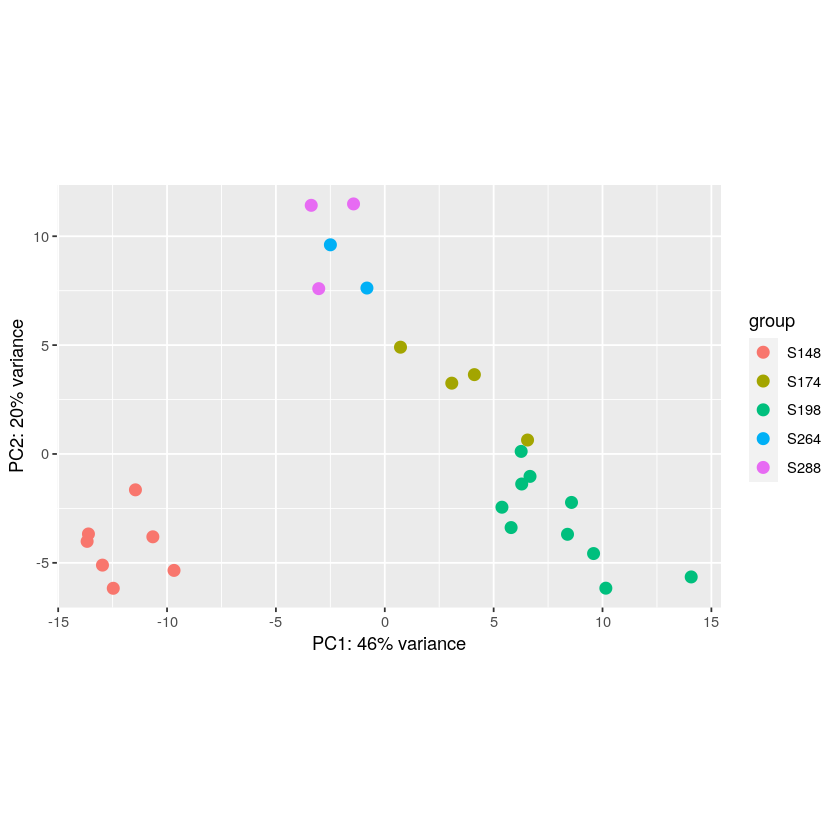

In [18]:
plotPCA(vsd, intgroup = "project")

# Differential expression analysis

In [19]:
dge = DESeq(dds)
save(dge, file = paste(dp, "dge.RData", sep=''))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 315 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



Extract and save the normalized counts

In [20]:
norm_counts = counts(dge, normalized = TRUE)
save(norm_counts, file=paste(dp, "norm_counts.RData", sep=''))
write.table(norm_counts, paste(dp, "norm_counts", sep=''), sep = "\t", quote = FALSE)

Extract and save the Z-scores

In [21]:
mean_counts = apply(norm_counts, 1, mean)
sd_counts = apply(norm_counts, 1, sd)
z_scores = (norm_counts - mean_counts)/sd_counts
save(z_scores, file=paste(dp, "z_scores.RData", sep=''))
write.table(z_scores, paste(dp, "z_scores", sep=''), sep = "\t", quote = FALSE)

Extract some statistics about the Z-scores
1. Full dimension of Z-scores matrix
2. Z-score higher than 3.5 or smaller than -3.5
3. Percentage of Z-score higher than 3.5 or smaller than -3.5

In [22]:
dim(z_scores)
# z_score higher than 3.5 or smaller than -3.5
s = data.frame("z_scores > 3.5" = apply(z_scores > 3.5, 2, sum, na.rm = T), "z_scores < -3.5" = apply(z_scores < -3.5, 2, sum, na.rm = T))
t(s)
s_perc = 100 * s/dim(norm_counts)[1]
t(s_perc)
data.frame(number = apply(s,2,sum),
           minimum_percentage = apply(s_perc,2,min),
           maximum_percentage = apply(s_perc,2,max),
           row.names = c("z_scores > 3.5", "z_scores < -3.5"))

[1] 18113    26

,GF_104w_M_1_2,GF_104w_M_2_2,GF_104w_M_3_2,GF_104w_M_4_2,GF_104w_M_5_2,GF_8w_M_1_2,GF_8w_M_2_2,GF_8w_M_3_2,GF_8w_M_4_2,SPF_104w_M_1_2,⋯,SPF_104w_M_3_2,SPF_104w_M_4_2,SPF_104w_M_5_2,SPF_104w_M_6_2,SPF_104w_M_7_2,SPF_104w_M_8_2,SPF_104w_M_9_2,SPF_8w_M_2_2,SPF_8w_M_3_2,SPF_8w_M_4_2
z_scores...3.5,147,195,161,149,166,325,272,229,91,245,⋯,138,219,96,259,101,143,103,270,281,114
z_scores....3.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,GF_104w_M_1_2,GF_104w_M_2_2,GF_104w_M_3_2,GF_104w_M_4_2,GF_104w_M_5_2,GF_8w_M_1_2,GF_8w_M_2_2,GF_8w_M_3_2,GF_8w_M_4_2,SPF_104w_M_1_2,⋯,SPF_104w_M_3_2,SPF_104w_M_4_2,SPF_104w_M_5_2,SPF_104w_M_6_2,SPF_104w_M_7_2,SPF_104w_M_8_2,SPF_104w_M_9_2,SPF_8w_M_2_2,SPF_8w_M_3_2,SPF_8w_M_4_2
z_scores...3.5,0.8115718,1.076575,0.8888644,0.8226136,0.9164688,1.794291,1.501684,1.264285,0.5024016,1.35262,⋯,0.7618837,1.209076,0.5300061,1.429912,0.5576106,0.7894882,0.5686523,1.490642,1.551372,0.6293822
z_scores....3.5,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.0000000,0.00000,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000


,number,minimum_percentage,maximum_percentage
,<int>,<dbl>,<dbl>
z_scores > 3.5,4380,0.4471926,1.794291
z_scores < -3.5,0,0.0000000,0.000000


Contrasts (factors)

In [23]:
contrast_names = resultsNames(dge)
contrast_names = gsub("^(Microbiota|Age)_", "", contrast_names)
contrast_names = gsub("\\.(Microbiota|Age)", " & ", contrast_names)
contrast_names = gsub("(Microbiota|Age)", "", contrast_names)
contrast_names = gsub("_", " ", contrast_names)
contrast_names

[1] "Intercept"    "GF vs SPF"    "Old vs Young" "GF & Old"

In [24]:
man_contrasts = as.data.frame(matrix(
        nrow=0,
        ncol=length(contrast_names)+1)) %>%
    rbind(c("GF vs SPF (Young)", 0, 1, 0, 0)) %>%
    rename_all(funs(c("Info", contrast_names))) %>%
    rbind(c("GF vs SPF (Old)", 0, 1, 0, 0)) %>%
    rbind(c("Old vs Young (SPF)", 0, 0, 1, 0)) %>%
    rbind(c("Old vs Young (GF)", 0, 0, 1, 1))
man_contrasts

Info,Intercept,GF vs SPF,Old vs Young,GF & Old
<chr>,<chr>,<chr>,<chr>,<chr>
GF vs SPF (Young),0,1,0,0
GF vs SPF (Old),0,1,0,0
Old vs Young (SPF),0,0,1,0
Old vs Young (GF),0,0,1,1


In [25]:
mod_mat = model.matrix(design(dds), colData(dds))
coeff_vectors = list(
    "GF / Young" = colMeans(mod_mat[dds$Microbiota == "GF" & dds$Age == "Young", ]),
    "SPF / Young" = colMeans(mod_mat[dds$Microbiota == "SPF" & dds$Age == "Young", ]),
    "GF / Old" = colMeans(mod_mat[dds$Microbiota == "GF" & dds$Age == "Old", ]),
    "SPF / Old" = colMeans(mod_mat[dds$Microbiota == "SPF" & dds$Age == "Old", ]))
coeff_vectors

$`GF / Young`
        (Intercept)        MicrobiotaGF              AgeOld MicrobiotaGF:AgeOld 
                  1                   1                   0                   0 

$`SPF / Young`
        (Intercept)        MicrobiotaGF              AgeOld MicrobiotaGF:AgeOld 
                  1                   0                   0                   0 

$`GF / Old`
        (Intercept)        MicrobiotaGF              AgeOld MicrobiotaGF:AgeOld 
                  1                   1                   1                   1 

$`SPF / Old`
        (Intercept)        MicrobiotaGF              AgeOld MicrobiotaGF:AgeOld 
                  1                   0                   1                   0

In [26]:
contrasts = as.data.frame(matrix(
        nrow=0,
        ncol=length(contrast_names)+1)) %>%
    rbind(c("GF vs SPF (Young)", coeff_vectors[["GF / Young"]] - coeff_vectors[["SPF / Young"]])) %>%
    rbind(c("GF vs SPF (Old)", coeff_vectors[["GF / Old"]] - coeff_vectors[["SPF / Old"]])) %>%
    rbind(c("Old vs Young (SPF)", coeff_vectors[["SPF / Old"]] - coeff_vectors[["SPF / Young"]])) %>%
    rbind(c("Old vs Young (GF)", coeff_vectors[["GF / Old"]] - coeff_vectors[["GF / Young"]])) %>%
    rename_all(funs(c("Info", contrast_names)))
contrasts
save(contrasts, file=paste(dp, "contrasts.RData", sep=''))

Info,Intercept,GF vs SPF,Old vs Young,GF & Old
<chr>,<chr>,<chr>,<chr>,<chr>
GF vs SPF (Young),0,1,0,0
GF vs SPF (Old),0,1,0,1
Old vs Young (SPF),0,0,1,0
Old vs Young (GF),0,0,1,1


# Citations

In [27]:
citation("DESeq2")


  Love, M.I., Huber, W., Anders, S. Moderated estimation of fold change
  and dispersion for RNA-seq data with DESeq2 Genome Biology 15(12):550
  (2014)

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2},
    author = {Michael I. Love and Wolfgang Huber and Simon Anders},
    year = {2014},
    journal = {Genome Biology},
    doi = {10.1186/s13059-014-0550-8},
    volume = {15},
    issue = {12},
    pages = {550},
  }
